# Analysis on Loan Default Risk

In this project, a credit division in a bank is asking for a report that analyzes the relation of marriage status, number of children owned, income, and borrowing purpose with probability of default on loan. A data on borrowers' debt eligibility is provided. The analyzes on this data will be used to evaluate borrowers' credit scoring that predicts the borrowers' repayment ability.

Hypothesis to be tested are:
1. Having children increases the probability of default
2. Marriage status affects the probability of default
3. Income affects the probability of default
4. Borrowing purpose affects the probability of default


## Import libraries and load data

In [ ]:
# Import all libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data
path ='/content/gdrive/MyDrive/data_projects/credit_scoring_eng.csv'
credit_scoring = pd.read_csv(path)

## Data Exploration

**Data Description**
- `children` - number of children in the household
- `days_employed` - borrowers' number of days working experience
- `dob_years` - borrowers' age in year
- `education` - borrowers' level of education
- `education_id` - ID assigned on borrowers' level of education
- `family_status` - borrowers' marriage status
- `family_status_id` - ID assigned on borrowers' marriage status
- `gender` - borrowers' gender
- `income_type` - borrowers' occupation status
- `debt` - whether a borrower has past due loan
- `total_income` - monthly income
- `purpose` - borrowers' purpose of borrowing

**Explore the data and observe on:**
1. Column name and number
2. Number of rows, and their non-null values
3. Number of null values in every column
4. Sample of rows

In [ ]:
# Load general info of the dataset
credit_scoring.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
# Load statistic description of the dataset
credit_scoring.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [ ]:
# Load data sample
print(credit_scoring.head(10))


   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  SECONDARY EDUCATION             1   
8         2   -6929.865299         35    BACHELOR'S DEGREE             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

In [ ]:
# Load unique values in every column
print('Number of unique values in every column')
print()
print('children')
print(credit_scoring['children'].value_counts())
print()
print('days_employed')
print(credit_scoring['days_employed'].value_counts())
print()
print('dob_years')
print(credit_scoring['dob_years'].value_counts())
print()
print('education')
print(credit_scoring['education'].value_counts())
print()
print('education_id')
print(credit_scoring['education_id'].value_counts())
print()
print('family_status')
print(credit_scoring['family_status'].value_counts())
print()
print('family_status_id')
print(credit_scoring['family_status_id'].value_counts())
print()
print('gender')
print(credit_scoring['gender'].value_counts())
print()
print('income_type')
print(credit_scoring['income_type'].value_counts())
print()
print('debt')
print(credit_scoring['debt'].value_counts())
print()
print('total_income')
print(credit_scoring['total_income'].value_counts())
print()
print('purpose')
print(credit_scoring['purpose'].value_counts())

Number of unique values in every column

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

days_employed
-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20

Several issues observed on the dataset:
1. Nulls in `days_employed` and `total_income`
2. Negative values in `days_employed`
3. Type of `days_employed` is float
4. Several values in `education` have the same meaning
5. Negative values in `children`

In [ ]:
# Load number of nulls in every column
print(credit_scoring.isna().sum())


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


There are nulls in column `days_employed` and `total_income`, and their amount is the same. There might be a relation. Test is needed.

In [ ]:
# Load dataset filtered on `days_employed`
credit_scoring.loc[credit_scoring['days_employed'].isna()].reset_index(drop=True)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
2170,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
2171,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
2172,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


At a glance the filtered table shows every null row on `days_employed`and `total_income` as symmetrical. It is worth checking for a symmetrical relationship. Both column are by filtered for null to see if the number of rows are the same with the number of rows of the previous filtered table.

In [ ]:
# Load dataset null-filtered both on `days_employed`and `total_income`
(credit_scoring.loc[(credit_scoring['days_employed'].isna()) & (credit_scoring['total_income'].isna())]).reset_index(drop=True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
2170,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
2171,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
2172,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


It appears that the number of rows is 2,174, exactly the same number with filtered only on one of either two columns.

In [ ]:
# percentage of missing values
round(credit_scoring.isna().sum()/len(credit_scoring)*100,2)

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

**Interim Conclusion**

From filtering dataset looking at nulls in both `days_employed` and `total_income`, it is shown that their rows are symmetrical. 

In the next step,  a relation in both columns will be observed more.

Percentage of the missing values was computed and it showed around 10% portion. Before dealing with them, more checking is needed.

Income is generally related to occupation. Hence distribution on `income_type` will be checked next. 

And a relation to `education` and other categorical columns: `family_status` and `gender`, will be checked as well.

In [ ]:
# Save filtered dataset on missing values `days_employed`
data_nan = credit_scoring.loc[(credit_scoring['days_employed'].isna())].reset_index(drop=True)


In [ ]:
# Load distribution of unique values of `income_type` for rows with missing values
print(data_nan['income_type'].value_counts(normalize=True))


employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64


In [ ]:
# Load distribution of unique values of `income_type` for rows in original data
print(credit_scoring['income_type'].value_counts(normalize=True))

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64


When comparing distribution of `income_type` in data with missing values only against the original one, the distribution seems similar, with employee's portion around 50%, followed by business 23% and retiree 18%. That means no certain pattern is shown yet. That then means no conclusion to what has caused the missing values can be drawn so far.

Hence the investigation is expanded to another columns. The same checking on distribution in column `education`, `family_status`, and `gender` will be the next step.

In [ ]:
# Load distribution of unique values of `education` for rows with missing values
data_nan['education'].value_counts(normalize=True)


secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

In [ ]:
# Load distribution of unique values of `education` for rows in original data
credit_scoring['education'].value_counts(normalize=True)


secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

In [ ]:
# Load distribution of unique values of `family_status` for rows with missing values
data_nan['family_status'].value_counts(normalize=True)


married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

In [ ]:
# Load distribution of unique values of `family_status` for rows in original data
credit_scoring['family_status'].value_counts(normalize=True)


married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

In [ ]:
# Load distribution of unique values of `gender` for rows with missing values
data_nan['gender'].value_counts(normalize=True)


F    0.682613
M    0.317387
Name: gender, dtype: float64

In [ ]:
# Load distribution of unique values of `gender` for rows in original data
credit_scoring['gender'].value_counts(normalize=True)


F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

**Interim Conclusion**

When comparing distribution of `education`, `family_status`, and`gender` in data with missing values only against the original one, the distribution seems similar. That means once again there's no certain pattern is shown. 

Side note came from checking the distribution in `education`, there's an implicit duplicates in the data that are caused by use of capital letter.

**Conclusion**

After making comparison over distribution of `education`, `family_status`, and`gender` in data containing only rows with all missing values to ditribution of the original one, there is no particular pattern appears that would show the possible cause of the missing values. 

In the next step:
1. Categorisations will be made over data in column `dob_years`, `income_type` and `purpose` to show a clearer depiction of the dataset, as well as the possible cause of the missing values.
2. Transformation of data by handling the missing values, replacing the values that do not make sense, handling the implicit duplicates, and also the explicit ones.

## Data Transformation

In the next step, column `education` is checked

---



In [ ]:
# Load all unique values in education
credit_scoring['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [ ]:
# Fix writing in education
credit_scoring['education'] = credit_scoring['education'].str.lower()

In [ ]:
# Re-check all unique values
credit_scoring['education'].value_counts()


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In the next step, column `children` is checked

In [ ]:
# Load unique values in `children`
credit_scoring['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

There is an odd value in `children`.
The number of children should not be negative. It is possible that some respondents misunderstood by answering -1 for answer 1. Every -1 will be changed to 1. Aside, there is value of 20, which is unlikely for number of children. Probably a 0 was misplaced, so 20 will be changed to 2.

In [ ]:
# Change -1 to 1
credit_scoring.loc[credit_scoring['children'] == -1, 'children'] = 1

In [ ]:
# Change 20 to 2
credit_scoring.loc[credit_scoring['children'] == 20, 'children'] = 2

In [ ]:
# Re-check unique values in `children`
credit_scoring['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

The `days_employed` column, in addition to having missing values, is also expressed in decimal, and also has many negative numbers.
For now we will deal with negative numbers. This is probably caused by a technical error. 

But before replacing them with their absolute number, their total income will be checked to conclude that indeed the issue was caused by technical error.

In [ ]:
# Load number of negative in days_employed
print((credit_scoring['days_employed'] < 0).sum())

# Load the portion
print(len(credit_scoring['days_employed'][credit_scoring['days_employed'] < 0]) / 
      len(credit_scoring['days_employed']))

15906
0.7389547038327526


It appears that the negative values ​​in `days_employed` comprises around 74% of total data. It also appears that each negative `days_employed` has income. So it can be concluded that these negative values are probably caused by a technical error, so they can be replaced with their absolute values.

In [ ]:
# Replace all values with their absolute

credit_scoring['days_employed'] = credit_scoring['days_employed'].abs()

In [ ]:
# Re-check negative values
(credit_scoring['days_employed'] < 0).value_counts()

False    21525
Name: days_employed, dtype: int64

In the next step, unreasonable values will be checked. Maximum age of the respondents is 75 years old. A value of more than 75 years or 27,375 days in `days_employed` will then be unreasonable.

In [ ]:
# Load unreasonable values in days_employed

credit_scoring.loc[credit_scoring['days_employed'] > 27375, ['days_employed']].describe()

,days_employed
count,3445.000000
mean,365004.309916
std,21075.016396
min,328728.720605
25%,346639.413916
50%,365213.306266
75%,383246.444219
max,401755.400475


In [ ]:
# Check the percentage

len(credit_scoring.loc[credit_scoring['days_employed'] > 27375, ['days_employed']])/len(credit_scoring)*100

16.004645760743323

In [ ]:
# Drop unreasonable values
credit_scoring = credit_scoring.drop(credit_scoring.loc[credit_scoring['days_employed'] > 27375].index)


In [ ]:
# Re-check statisical descprition
credit_scoring.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,18080.000000,15906.000000,18080.000000,18080.000000,18080.000000,18080.000000,15906.000000
mean,0.552876,2353.015932,40.276825,0.798673,0.970299,0.086228,27837.509634
std,0.790152,2304.243851,10.974709,0.551921,1.439355,0.280708,16980.846677
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,3418.824000
25%,0.000000,756.371964,32.000000,0.000000,0.000000,0.000000,17323.415000
50%,0.000000,1630.019381,40.000000,1.000000,0.000000,0.000000,24181.535000
75%,1.000000,3157.480084,48.000000,1.000000,1.000000,0.000000,33839.106500
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,362496.645000


In the next step `dob_years` will be observed.

In [ ]:
# Check `dob_years` less than 15
credit_scoring.loc[credit_scoring['dob_years'] < 15, ['dob_years']].value_counts()


dob_years
0            84
dtype: int64

There is 0 value in the `dob_years`. This value is unreasonable, so rows with 0 will be dropped.

In [ ]:
# Drop 0 value
credit_scoring = credit_scoring.drop(credit_scoring.loc[credit_scoring['dob_years'] == 0].index)

In [ ]:
# Re-check for 0 value
credit_scoring.loc[credit_scoring['dob_years'] == 0, ['dob_years']].value_counts()

Series([], dtype: int64)

In the next step, column `family_status` is observed.

In [ ]:
# Load unique values in family_status
credit_scoring['family_status'].value_counts(dropna=False)


married              10466
civil partnership     3579
unmarried             2488
divorced               988
widow / widower        475
Name: family_status, dtype: int64

In the next step, column `gender` is observed.

In [ ]:
# Load unique values in gender
credit_scoring['gender'].value_counts(dropna=False)

F      11373
M       6622
XNA        1
Name: gender, dtype: int64


In the `gender` column there is 1 outlier, namely XNA. Since it maked only 1, it will be changed to F which makes the larget portion of all values.

In [ ]:
# Change XNA to F

credit_scoring.loc[credit_scoring['gender'] == 'XNA', 'gender'] = 'F'

In [ ]:
# Re-check unique values
credit_scoring['gender'].value_counts(dropna=False)


F    11374
M     6622
Name: gender, dtype: int64

In the next step, `income_type` will be observed.

In [ ]:
# Mari kita lihat nilai dalam kolom ini
credit_scoring['income_type'].value_counts(dropna=False)

employee                       11064
business                        5065
civil servant                   1453
retiree                          410
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

There is an `entrepreneur` value which is essentially the same as `business`, so `entrepreneur` will be replaced with `business`. Also then `paternity / maternity leave` will be changed to `employee`. Also `student` will be changed with `unemployed`. These four values ​​only have 1 or 2 rows. So replacing them will not change the data significantly, while it helps to have less categories.

In [ ]:
# Replace the values to combine them to other values
credit_scoring.loc[credit_scoring['income_type'] == 'paternity / maternity leave', 'income_type'] = 'employee'
credit_scoring.loc[credit_scoring['income_type'] == 'student', 'income_type'] = 'unemployed'
credit_scoring.loc[credit_scoring['income_type'] == 'entrepreneur', 'income_type'] = 'business'

In [ ]:
# Re-check unique values
credit_scoring['income_type'].value_counts()


employee         11065
business          5067
civil servant     1453
retiree            410
unemployed           1
Name: income_type, dtype: int64

In the next step, duplicate is checked.

In [ ]:
# Check duplicates
credit_scoring.duplicated().sum()

71

In [ ]:
# Load duplicate rows
credit_scoring.loc[credit_scoring.duplicated()].reset_index(drop=True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
1,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
2,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
3,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
4,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
67,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
68,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
69,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [ ]:
# Drop duplicates
credit_scoring.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
# Re-check duplicates
credit_scoring.duplicated().sum()

0

In [ ]:
# Load general info on dataset
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17925 non-null  int64  
 1   days_employed     15832 non-null  float64
 2   dob_years         17925 non-null  int64  
 3   education         17925 non-null  object 
 4   education_id      17925 non-null  int64  
 5   family_status     17925 non-null  object 
 6   family_status_id  17925 non-null  int64  
 7   gender            17925 non-null  object 
 8   income_type       17925 non-null  object 
 9   debt              17925 non-null  int64  
 10  total_income      15832 non-null  float64
 11  purpose           17925 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.6+ MB


Now the new dataset has fewer rows, that is 21,454. The number of columns remains 12. And with fewer missing values, that is 2,103 missing values ​​in each of the days_employed and total_income columns.


# Work with missing values

### Handle missing values in `total_income`

In the next steps, the missing values ​​in total_income will be worked first. A new column that categorise ages will be created. From the description of statistics, it shows facts about age. The first, and third quartiles are 33 and 53, respectively. The median is 42. The highest is 75. And the mean is 43.
Therefore categorisation of age will be made using the function below.

In [ ]:
# Define function to categorize age
def assign_age_group(age):
    try:
        if age < 18 or np.isnan(age):
            return 'below18'
        elif age < 30:
            return 'young_adult'
        elif age < 64:
            return 'adult'
        else:
            return 'elderly'
    except:
        return 'NA'
   

In [ ]:
# Test function to see if it works
test_Nan = assign_age_group(float('Nan'))
print(test_Nan)
test_17 = assign_age_group(17)
print(test_17)
test_27 = assign_age_group(27)
print(test_27)
test_40 = assign_age_group(40)
print(test_40)
test_82 = assign_age_group(82)
print(test_82)

below18
below18
young_adult
adult
elderly


In [ ]:
# Create new column for age using deob_years
credit_scoring['dob_group'] = credit_scoring['dob_years'].apply(assign_age_group)


In [ ]:
# Check unique values in the new column
credit_scoring['dob_group'].value_counts()


adult          14477
young_adult     3173
elderly          275
Name: dob_group, dtype: int64

From the available observed data, factors that usually relate to a person's income are:
1. Age
2. Income source/ type
3. Education level

In the next steps, a new dataset that is clean from missing values will be created. Then typical data (mean or median) of total_income that are based on those 3 factors will be inferred.

Before filling in missing values, a new dataset excluding missing values will be created.

In [ ]:
# Create new dataset excluding missing values, and then load data sample
data_clean = credit_scoring.dropna().reset_index(drop=True)
data_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,young_adult


In [ ]:
# Load general info on the new clean dataset
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          15832 non-null  int64  
 1   days_employed     15832 non-null  float64
 2   dob_years         15832 non-null  int64  
 3   education         15832 non-null  object 
 4   education_id      15832 non-null  int64  
 5   family_status     15832 non-null  object 
 6   family_status_id  15832 non-null  int64  
 7   gender            15832 non-null  object 
 8   income_type       15832 non-null  object 
 9   debt              15832 non-null  int64  
 10  total_income      15832 non-null  float64
 11  purpose           15832 non-null  object 
 12  dob_group         15832 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [ ]:
# Load mean and median of total_income based on dob_group
data_clean.pivot_table(index = 'dob_group', values = 'total_income', aggfunc=['mean', 'median'])

,mean,median
,total_income,total_income
dob_group,,
adult,28330.324243,24565.6280
elderly,30135.480741,25648.0425
young_adult,25559.861636,22794.7330


In [ ]:
# Load mean and median of total_income based on education
data_clean.pivot_table(index = 'education', values = 'total_income', aggfunc=['mean', 'median'])

,mean,median
,total_income,total_income
education,,
bachelor's degree,33895.773014,28744.4340
graduate degree,27772.929500,25161.5835
primary education,22990.762982,20823.9590
secondary education,25506.021789,22678.9820
some college,29419.492013,26119.0075


In [ ]:
# Load mean and median of total_income based on income_type
data_clean.pivot_table(index = 'income_type', values = 'total_income', aggfunc=['mean', 'median'])

,mean,median
,total_income,total_income
income_type,,
business,32407.766937,27571.0825
civil servant,27361.316126,24083.5065
employee,25822.952345,22814.0140
unemployed,15712.260000,15712.2600


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


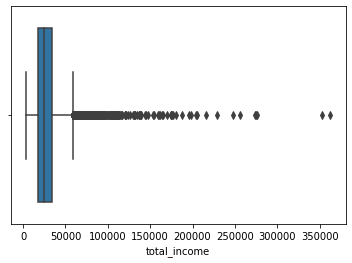

In [ ]:
# Check for outliers

sns.boxplot(data_clean['total_income'])

The original data has a median total_income of 23,202 and a mean of 26,787. The highest income is 36,249 and the lowest is 3,306.

Just like the median and mean of the clean dataset, it appears that they differ significantly. Since the data contains many outliers, its median is a better representative of typical value. So the median will be used to fill in the missing values.

The most related factors to income are age group and type of income. Therefore the median that is based on thse two columns will be used.

In [ ]:
# Load median of total_income based on dob_group and income_type
data_clean.groupby(['dob_group', 'income_type'])['total_income'].median().reset_index()

,dob_group,income_type,total_income
0,adult,business,28372.6700
1,adult,civil servant,24137.1830
2,adult,employee,23054.3295
3,elderly,business,29127.8650
4,elderly,civil servant,26089.6870
5,elderly,employee,24643.1985
6,young_adult,business,25599.1250
7,young_adult,civil servant,23504.5105
8,young_adult,employee,21537.4790
9,young_adult,unemployed,15712.2600


In [ ]:
#  Define function to fill in missing values
def fill_na(df, agg_column_1, agg_column_2, value_column):
    grouped_values = df.groupby([agg_column_1, agg_column_2])[value_column].median().reset_index()
    size = len(grouped_values)
    for n in range(size):
        group1 = grouped_values[agg_column_1][n]
        group2 = grouped_values[agg_column_2][n]
        value = grouped_values[value_column][n]
        df.loc[(df[agg_column_1]==group1) & (df[agg_column_2]==group2) & (df[value_column].isna()), value_column] = value
    return df

In [ ]:
# Apply function to create new dataset with filled-in missing values
credit_scoring = fill_na(df=credit_scoring, 
                         agg_column_1='dob_group', 
                         agg_column_2='income_type', 
                         value_column='total_income')

In [ ]:
# Load general info of the dataset
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17925 non-null  int64  
 1   days_employed     15832 non-null  float64
 2   dob_years         17925 non-null  int64  
 3   education         17925 non-null  object 
 4   education_id      17925 non-null  int64  
 5   family_status     17925 non-null  object 
 6   family_status_id  17925 non-null  int64  
 7   gender            17925 non-null  object 
 8   income_type       17925 non-null  object 
 9   debt              17925 non-null  int64  
 10  total_income      17542 non-null  float64
 11  purpose           17925 non-null  object 
 12  dob_group         17925 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.8+ MB


###  Handle missing values in `days_employed`

From the available observed data, factors that usually relate to a person's days working are:
1. Age
2. Education level

In the next steps, the typical data (mean or median) of days_employed that are based on those 2 factors will be inferred.

In [ ]:
# Load median and mean in days_employed based on dob_group
data_clean.groupby('dob_group')['days_employed'].agg(['median', 'mean'])


,median,mean
dob_group,,
adult,1874.546554,2589.399590
elderly,2579.458493,4020.774858
young_adult,996.761544,1209.928267


In [ ]:
# Load median and mean in days_employed based on education
data_clean.groupby('education')['days_employed'].agg(['median', 'mean'])


,median,mean
education,,
bachelor's degree,1611.056758,2277.650856
graduate degree,3851.735057,3520.186537
primary education,1189.581396,1940.672957
secondary education,1686.419677,2435.122216
some college,1151.756703,1567.252403


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


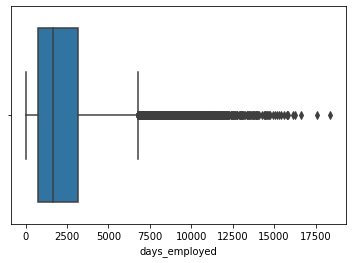

In [ ]:
# Check for outliers
sns.boxplot(data_clean['days_employed'])

There are many outliers in `days_employed`. It is better then taking the median as a representative of typical values, and using it to fill in the missing values.

In [ ]:
# Fill in missing values in days_employed by applying the already defined function
credit_scoring = fill_na(df=credit_scoring,
                         agg_column_1='dob_group', 
                         agg_column_2='education', 
                         value_column='days_employed')


In [ ]:
# Check general info on the new dataset
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17925 non-null  int64  
 1   days_employed     17925 non-null  float64
 2   dob_years         17925 non-null  int64  
 3   education         17925 non-null  object 
 4   education_id      17925 non-null  int64  
 5   family_status     17925 non-null  object 
 6   family_status_id  17925 non-null  int64  
 7   gender            17925 non-null  object 
 8   income_type       17925 non-null  object 
 9   debt              17925 non-null  int64  
 10  total_income      17542 non-null  float64
 11  purpose           17925 non-null  object 
 12  dob_group         17925 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.8+ MB


The missing values in days_employed have been filled in.

In the next step, data type of days_employed is changed to type integer.

In [ ]:
# Change data type
credit_scoring['days_employed'] = credit_scoring['days_employed'].astype('int')

## Data Categorization

In order to address the mentioned hypothesis, categorisation of values in total_income and purpose will be made.

In the next step, unique values in 'purpose' is checked

In [ ]:
# Load unique values in purpose
credit_scoring['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'housing transactions', 'education', 'having a wedding',
       'purchase of the house for my family', 'buy real estate',
       'buy commercial real estate', 'to have a wedding',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying my own car',
       'buying a second-hand car', 'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education',
       'transactions with commercial real estate', 'to own a car',
       'purchase of a car', 'profile education', 'university education',
       'to buy a car', 'buying property for renting out',
       'housing renovation', 'going

It appears that unique values in 'purpose' can be grouped into general topics:
1. Wedding
2. Property
3. Education
4. Car


In [ ]:
# Define function to categorize the values into the general group
def purpose_topic(row):
    if row in values_wedding:
        return 'wedding'
    elif row in values_property:
        return 'property'
    elif row in values_education:
        return 'education'
    elif row in values_car:
         return 'car'

In [ ]:
# Save values for wedding group
values_wedding = ['to have a wedding', 'having a wedding', 'wedding ceremony']

# Save values for property group
values_property = ['purchase of the house', 'housing transactions', 'purchase of the house for my family', 'buy real estate', 'buy commercial real estate', 'buy residential real estate', 'construction of own property', 'property', 'building a property',
      'transactions with commercial real estate', 'building a real estate', 'housing', 'transactions with my real estate', 'purchase of my own house', 'real estate transactions', 'buying property for renting out', 'housing renovation']

# Save values for education group
values_education = ['supplementary education', 'education', 'to become educated', 'getting an education', 'to get a supplementary education', 
                    'getting higher education', 'profile education', 'university education', 'going to university']

# Save values for car group
values_car = ['car purchase', 'buying a second-hand car',
       'buying my own car', 'cars', 'second-hand car purchase', 'car', 'to own a car', 'purchase of a car', 'to buy a car']


In [ ]:
# Create new column for general group by applying the function and check the values
credit_scoring['purpose_topic'] = credit_scoring['purpose'].apply(purpose_topic)
credit_scoring['purpose_topic'].value_counts()

property     9070
car          3572
education    3347
wedding      1936
Name: purpose_topic, dtype: int64

In the next step, total_income will be categorised and a new column will be created.

In [ ]:
# Load all unique values
credit_scoring['total_income'].value_counts().sort_index()

3418.824      1
4036.463      1
4212.770      1
4245.348      1
4494.861      1
             ..
273809.483    1
274402.943    1
276204.162    1
352136.354    1
362496.645    1
Name: total_income, Length: 15835, dtype: int64

In [ ]:
# Load statistical description
round(credit_scoring['total_income'].describe(),0)


count     17542.0
mean      27511.0
std       16202.0
min        3419.0
25%       17992.0
50%       23724.0
75%       32327.0
max      362497.0
Name: total_income, dtype: float64

In [ ]:
# Check for outliers
px.box(credit_scoring, y='total_income')

There are many outliers in `total_income`. The minimum value is 3.306. The maximum is 362.496, which falls beyond three times of the standard deviation from the mean. 

In categorising, two middle range around the median with the same size and touching the upper fence is defined. While top and bottom range are to contain the top and bottom outliers.

In [ ]:
# Define function for categorisation
def income_class(income):
    try:
        if income < 8000:
            return 'lower'
        elif 8000 <= income < 23000:
            return 'lower middle'
        elif 23000 <= income < 38000:
            return 'middle'
        else:
            return 'upper middle'
    except:
        return 'NA'

In [ ]:
# Create a column containing the categories by applying the function
credit_scoring['income_class'] = credit_scoring['total_income'].apply(income_class)

In [ ]:
# Load distribution of unique values
round(credit_scoring['income_class'].value_counts(normalize=True)*100,2)

lower middle    40.59
middle          40.15
upper middle    18.20
lower            1.07
Name: income_class, dtype: float64

## Checking the hypothesis


In the next step, the hypothesis are checked

In [ ]:
# Load general info of the dataset
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17925 non-null  int64  
 1   days_employed     17925 non-null  int64  
 2   dob_years         17925 non-null  int64  
 3   education         17925 non-null  object 
 4   education_id      17925 non-null  int64  
 5   family_status     17925 non-null  object 
 6   family_status_id  17925 non-null  int64  
 7   gender            17925 non-null  object 
 8   income_type       17925 non-null  object 
 9   debt              17925 non-null  int64  
 10  total_income      17542 non-null  float64
 11  purpose           17925 non-null  object 
 12  dob_group         17925 non-null  object 
 13  purpose_topic     17925 non-null  object 
 14  income_class      17925 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 2.1+ MB


In [ ]:
# Re-check for duplicate
credit_scoring.duplicated().sum()

0

### **Is there a correlation between having children and paying off on time?**

In [ ]:
# Load pivot table that gorups event of timely payment and default by number of children
credit_scoring.pivot_table(index='children', columns='debt', values='dob_years', aggfunc='count', margins=True,margins_name='Total')


debt,0,1,Total
children,,,
0,9993.0,892.0,10885
1,4149.0,430.0,4579
2,1890.0,200.0,2090
3,296.0,26.0,322
4,36.0,4.0,40
5,9.0,NaN,9
Total,16373.0,1552.0,17925


In [ ]:
# Check number of of event of default based on number of children
debt_1 = credit_scoring[credit_scoring['debt'] == 1]
debt_1.groupby('children')['debt'].count()

children
0    892
1    430
2    200
3     26
4      4
Name: debt, dtype: int64

**Conclusion**

A relationship between having children and timeliness of repayment is observed. From the pivot table that compares the distribution of defaults and non-defaults, as well as from the grouping of defaults based on the number of children, it appears that there is no trend exists indicating such a relationship. In the event of default, the borrowers mostly do not have children. The event of defaults decreases as the number of children increases. However, in the event of timely repayment, a similar trend exists. 

In general, the distribution ratio in each value of the number of children between on timely repayment : default is around 91% : 9%. Hence it can be concluded that there is no relationship between the number of children and event of default.

### **Is there a correlation between family status and timely repayment?**

In [ ]:
# Load pivot table gorups event of timely payment and default for each family_status 
family_pivot = credit_scoring.pivot_table(index='family_status', columns='debt', values='dob_years', aggfunc='count', margins=True, margins_name='Total')
family_pivot['% timely'] = family_pivot[0]/(family_pivot.loc['Total',0])*100
family_pivot['% late'] = family_pivot[1]/(family_pivot.loc['Total',1])*100

family_pivot

debt,0,1,Total,% timely,% late
family_status,,,,,
civil partnership,3196,357,3553,19.519941,23.002577
divorced,914,74,988,5.582361,4.768041
married,9596,829,10425,58.608685,53.414948
unmarried,2224,261,2485,13.583338,16.817010
widow / widower,443,31,474,2.705674,1.997423
Total,16373,1552,17925,100.000000,100.000000


In [ ]:
# Load event of defaults based on family_status

debt_1.groupby('family_status')['debt'].count()


family_status
civil partnership    357
divorced              74
married              829
unmarried            261
widow / widower       31
Name: debt, dtype: int64

**Conclusion**

A relationship between marital status to timeliness of repayment is observed

From the pivot table and groupby, it appears that the percentage of event of default is greater than of timely repayment for civil_partnership and unmarried. This is  contrast to married, widowed, and divorced. 

However, the difference between the percentage of default and timely repayment is not too significant so it can be concluded that there is no effect of marital status on timeliness in paying off loans.

### **Is there a correlation between income levels and timely repayment?**

In [ ]:
# Load pivot tabel that groups event of timely payment and default for each income level
income_pivot = credit_scoring.pivot_table(index='income_class', columns='debt', values='dob_years', aggfunc='count')
income_pivot['% timely'] = income_pivot[0]/(income_pivot[0].sum())*100
income_pivot['% late'] = income_pivot[1]/(income_pivot[1].sum())*100

income_pivot



debt,0,1,% timely,% late
income_class,,,,
lower,177,14,1.081048,0.902062
lower middle,6586,689,40.224760,44.394330
middle,6590,607,40.249191,39.110825
upper middle,3020,242,18.445001,15.592784


In [ ]:
# Load event of default based on income_class
debt_1.groupby('income_class')['debt'].count()


income_class
lower            14
lower middle    689
middle          607
upper middle    242
Name: debt, dtype: int64

**Conclusion**

A relationship between income_class to timeliness of repayment is observed.

From the pivot and grouping results, it appears that in general the greater the income, the lower the default rate. This is what is happening in the lower middle, middle, and upper middle income classes. Only the lower classes are outliers. Consider that it has small amount of data, it can be ignored. Hence it can be concluded that the higher the income, the lower the default rate.


### **How ​​does borrowing purpose affect default rates?**

In [ ]:
# Load pivot tabel that groups event of timely payment and default for each purpose

purpose_pivot = credit_scoring.pivot_table(index='purpose_topic', columns='debt', values='dob_years', aggfunc='count')
purpose_pivot['% timely'] = purpose_pivot[0]/(purpose_pivot[0].sum())*100
purpose_pivot['% late'] = purpose_pivot[1]/(purpose_pivot[1].sum())*100

purpose_pivot


debt,0,1,% timely,% late
purpose_topic,,,,
car,3214,358,19.629878,23.067010
education,3019,328,18.438893,21.134021
property,8369,701,51.114640,45.167526
wedding,1771,165,10.816588,10.631443


**Conclusion**

A relationship between borrowing purpose and timeliness of repayment is observed.

From the results of the pivot, it appears that the purpose of borrowing for cars and education is more likely to go on default. While for property and wedding purposes there is no significant difference between rate of defaults and timely repayment.


# General conclusion

First, the missing values ​​in days_employed and total_income are not clearly identified. The proportion is 10% of the total data. Because the portion is quite significant, keeping the obervations might be beneficial for the testing the hypothesis. Median then is used to fill in the missing values. The median is preferred over the mean because of the massive number of outliers in the data.
On another note, the median used is the median that is grouped by other relating, obersed factors.

Second, explicit duplicates are found, which account for 0.3% of the total data. The cause for the duplicates is not known. Since the portion is small, it is pragmatic to drop them.

Third, it is found that values are written in redundant ways, causing many unique values have one exactly the same meaning. A standardisation the is done to the writing style using all lowercase letters.

Fourth, unreasonable values exist, such as negative values ​​for the number of children, and implausible number of days working. A technical error is assumed to has happned that causes the unreasonable values, and they then so are replaced with their absolute values, or reasonable value.

Fifth, the data type are changed to the suitable one.

In the final steps, the hypothetical questions are addressed. The conclusions drawns are:
1. There is no effect of the number of children had to the timeliness of repayment.
2. Civil partnership and unmarried marital status have a greater possibilities to default.
3. The greater the income level, the smaller the probability of default.
4. Loans for the purpose of buying cars and education has a greater probability to default.